# Collaborative Filtering with Neural Nets

In [1]:
# for data manipulation
import numpy as np
import pandas as pd
import os
import pickle
from tqdm import tqdm

# use surprise for collaborative filtering
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# plot
import matplotlib.pyplot as plt

## Read in data

In [2]:
game_data_path = "../data/neural_net_data/"
files = sorted(os.listdir(game_data_path))

files = ["2012-2013.pkl", "2013-2014.pkl", "2014-2015.pkl", "2015-2016.pkl", "2016-2017.pkl", "2017-2018.pkl"]

X_train = np.zeros(5)

for file in files[:-2]:
    if ".pkl" not in file: continue
    
    with open(game_data_path + file, 'rb') as f:
        print(file)
        if X_train.shape[0] == 5:
            X_train, y_train = pickle.load(f, encoding='latin1')
        else:
            X_add, y_add = pickle.load(f, encoding='latin1')
            print(X_train.shape)
            print(X_add.shape)
            X_train = np.concatenate((X_train, X_add), axis = 0)
            y_train = np.concatenate((y_train, y_add), axis = 0)

with open(game_data_path + files[-2], 'rb') as f:
        print(files[-2])
        X_val, y_val = pickle.load(f, encoding='latin1')
        
with open(game_data_path + files[-1], 'rb') as f:
        print(files[-1])
        X_test, y_test = pickle.load(f, encoding='latin1')

2012-2013.pkl
2013-2014.pkl
(1265, 3, 508)
(1272, 3, 508)
2014-2015.pkl
(2537, 3, 508)
(1263, 3, 508)
2015-2016.pkl
(3800, 3, 508)
(1269, 3, 508)
2016-2017.pkl
2017-2018.pkl


In [3]:
X_test.shape

(1264, 3, 508)

In [4]:
X_train.shape

(5069, 3, 508)

In [5]:
X_val.shape

(1260, 3, 508)

## Clean Data

In [6]:
def clean_data(X, y):
    X = X[y > 0]
    y = y[y > 0]
    
    return X, y

In [7]:
X_train, y_train = clean_data(X_train, y_train)
X_val, y_val = clean_data(X_val, y_val)
X_test, y_test = clean_data(X_test, y_test)

In [8]:
# Define a generic LSTM model
def create_lstm_model(input_shape, lstm_units=64, dense_units=32, dropout_rate=0.2, output_units=1):
    model = Sequential([
        LSTM(lstm_units, input_shape=input_shape, return_sequences=False),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(output_units)  # For regression; use activation='softmax' and adjust units for classification
    ])
    return model

# Compile and train the model
def train_lstm_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Change loss for classification
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return model, history

# Evaluate on test data
def evaluate_lstm_model(model, X_test, y_test):
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")
    return test_loss, test_mae


In [25]:
lstm_units_list = [32, 64, 128, 256] #256
dense_units_list = [128]
dropout_rates = [0.1, 0.2, 0.4, 0.5]
epochs = [10,20,30]
batch_size_list = [10,20,32,40]

In [34]:
# Train dropout:
for unit in range(1):
  model = create_lstm_model(input_shape=X_train.shape[1:], lstm_units=256, dense_units=64, dropout_rate=0.1, output_units=1)
  model, history = train_lstm_model(model, X_train, y_train, X_val, y_val, epochs = 30, batch_size = 5)
  evaluate_lstm_model(model, X_test, y_test)

Epoch 1/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 10049.9346 - mae: 69.7368 - val_loss: 503.9383 - val_mae: 17.9451
Epoch 2/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 541.9549 - mae: 18.6444 - val_loss: 496.8817 - val_mae: 17.8110
Epoch 3/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 544.8274 - mae: 18.5514 - val_loss: 587.8328 - val_mae: 19.4674
Epoch 4/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 562.1401 - mae: 18.7565 - val_loss: 490.0040 - val_mae: 17.6843
Epoch 5/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 573.0295 - mae: 18.8368 - val_loss: 523.3924 - val_mae: 18.3019
Epoch 6/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 539.8181 - mae: 18.4418 - val_loss: 404.3501 - val_mae: 16.1212
Epoch 7/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 551.6993 - mae: 18.6086 - val_loss: 475.0814 - val_mae: 17.3964
Epoch 8/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 545.2465 - mae: 18.5736 - val_loss: 420.8981 - val_mae: 16.4095
Epoch

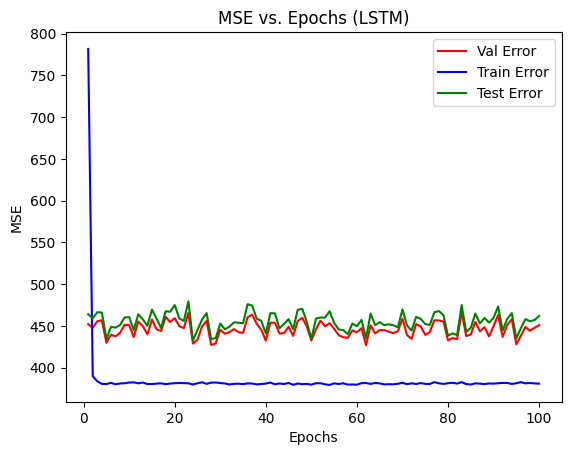

In [ ]:

# epochs = [i for i in range(1, 101, 1)]
# plt.plot(epochs, val_losses, color="red", label="Val Error")
# plt.plot(epochs, losses, color="blue", label="Train Error")
# plt.plot(epochs, test_losses, color="green", label="Test Error")
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("MSE")
# plt.title("MSE vs. Epochs (LSTM)")
# plt.savefig("lstm_train.jpg")
# plt.show()
